# <center> EDA for [Houses prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
    
### <center> Based on [this notebook](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
    
## Qué vamos a ver
1. **Understand the problem**.
2. **Univariable analysis**.
3. **Multivariate analysis**.
4. **Basic cleaning**. (missing data, outliers and categorical variables)
5. **Test assumptions**.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib inline
pd.set_option('display.max_columns', 1000) # Display all variables

# Leer datos

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/kaggle_house_prices_train.csv

In [3]:
df_train = pd.read_csv("../data/kaggle_house_prices_train.csv", index_col='Id')
df_test  = pd.read_csv("../data/kaggle_house_prices_test.csv", index_col='Id')

In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 80)

# 80 Variables

In [6]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

- **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

## Un buen ejercicio mental para hacer en este punto es ir variable a variable y pensar:
### - Nombre de la variable
### - Tipo de la variable (numérica o categórica)
### - Importancia (mucha o poca) sobre la variable objetivo (Precio de la casa)
### - Influencia (proporcional o inversamente prop) sobre la variable objetivo (Precio de la casa)

# Variable objetivo -> `df.SalePrice`

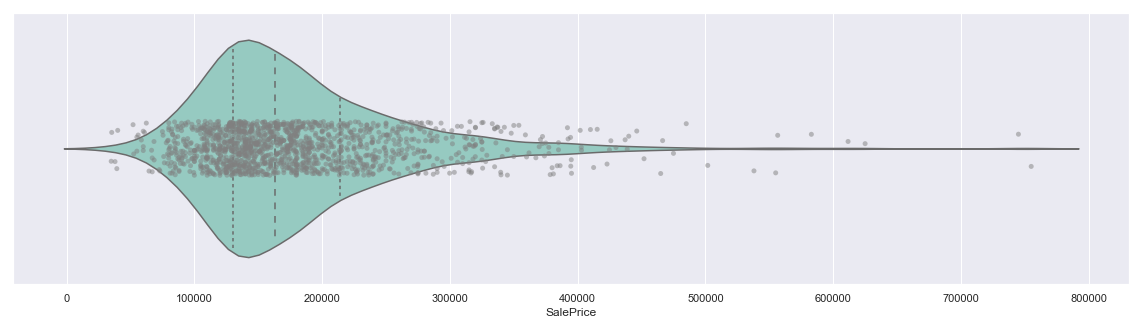

In [7]:
def ditribution(variable, size):
    plt.figure(figsize=size)
    sns.violinplot(variable, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.5);

ditribution(df_train.SalePrice, size=(20,5))

# Variables Numericas y Categoricas

In [8]:
cat = df_train.select_dtypes(include=[object]).columns#.values.tolist()
num = df_train.select_dtypes(exclude=[object]).columns#.values.tolist()
num = num.drop("SalePrice")

train_cat = df_train[cat]
train_num = df_train[num]

print("Numerical features : ", len(num))
print("Categorical features : ", len(cat))

Numerical features :  36
Categorical features :  43


## Top variables más correlacionadas con el precio de la casa `df.corrwith(var)`

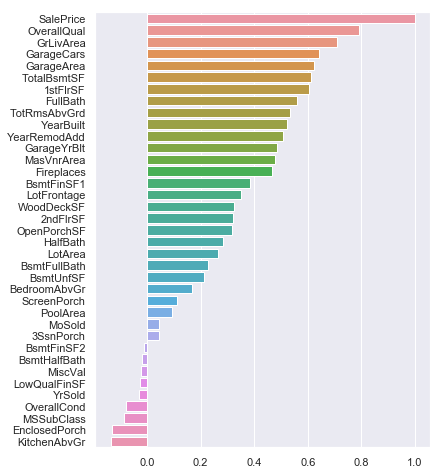

In [9]:
target_corrlations = df_train.corrwith(df_train['SalePrice']).sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(target_corrlations, target_corrlations.index);

### Cuanta más calidad más cara

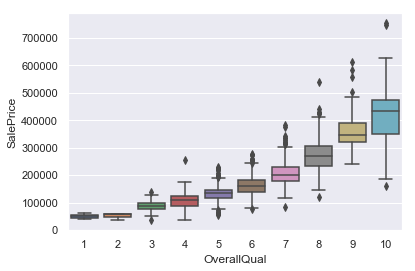

In [10]:
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice']);

### Cuanto más grande más cara

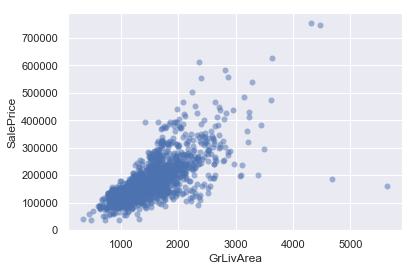

In [11]:
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], alpha=.5, linewidth=0);

### Cuanto más nueva más cara

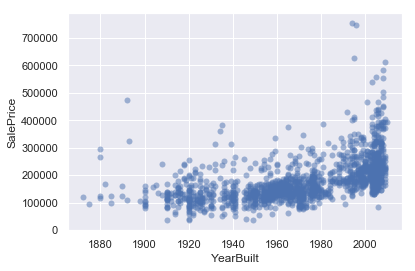

In [12]:
sns.scatterplot(x=df_train['YearBuilt'], y=df_train['SalePrice'], alpha=.5, linewidth=0);

# Pairplot

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


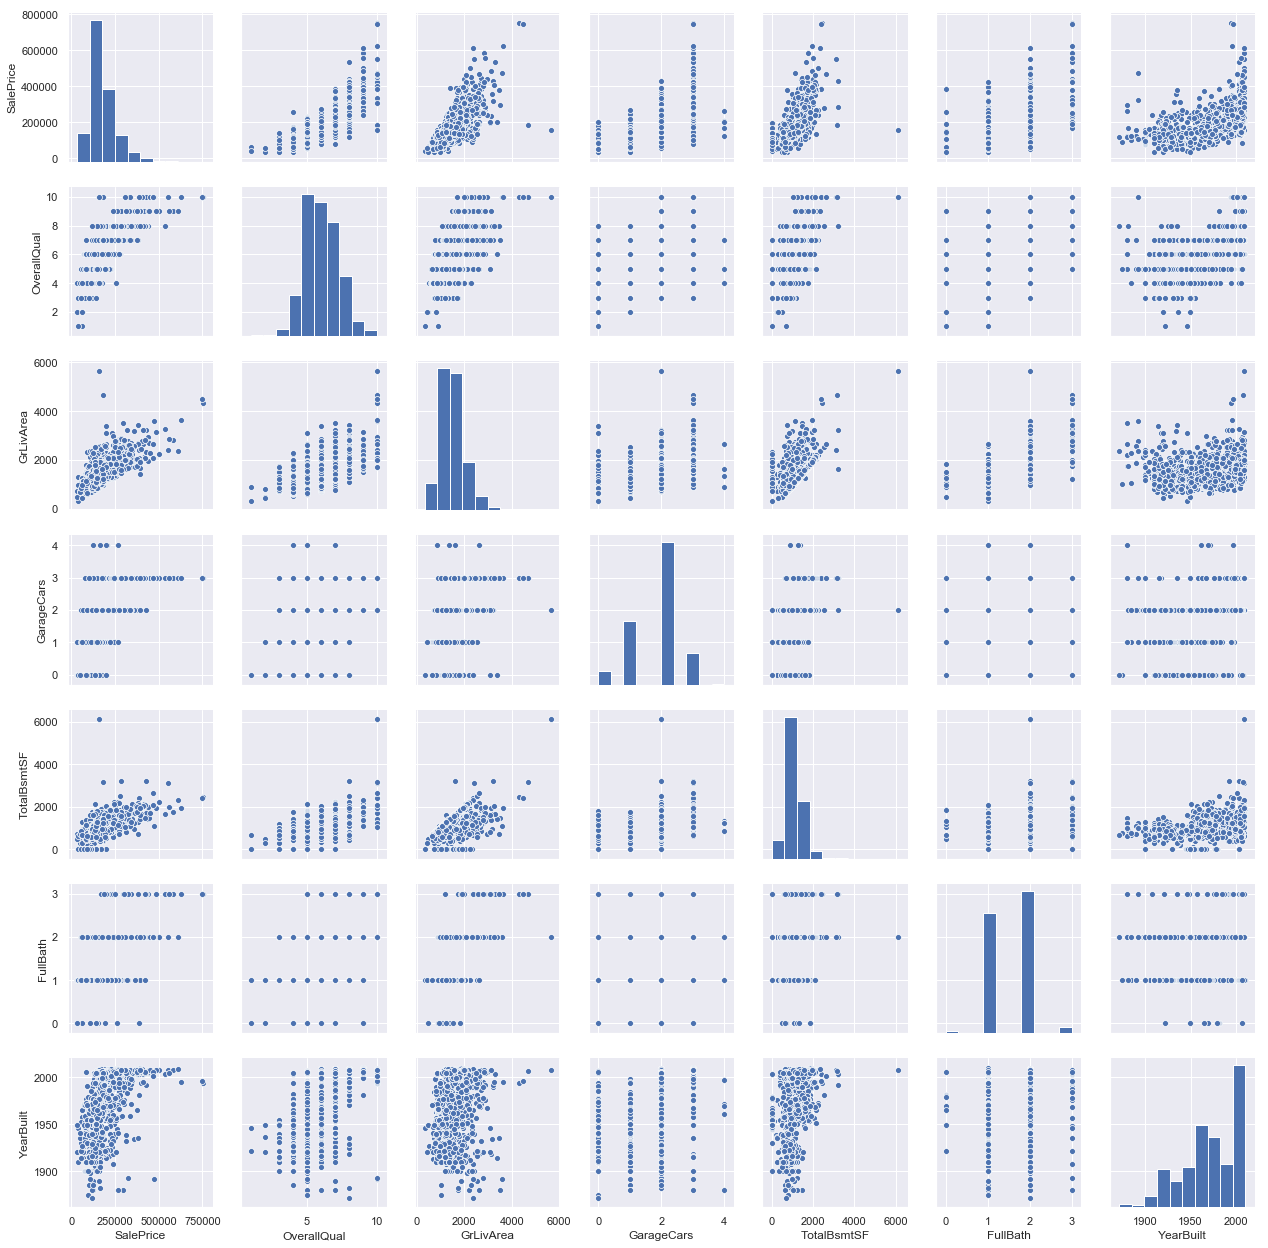

In [22]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# <center> Missings

In [23]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


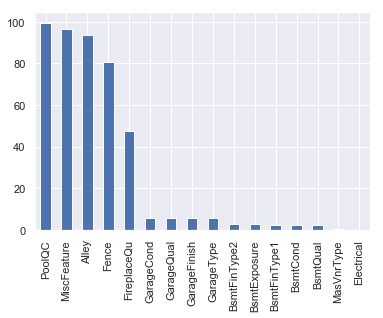

In [14]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(train_cat)

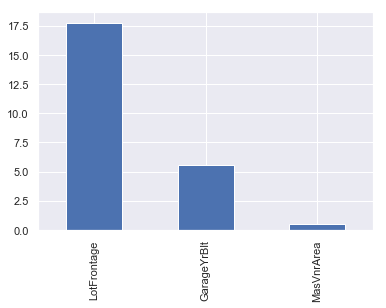

In [15]:
plot_missings(train_num)